In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 256
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [3]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

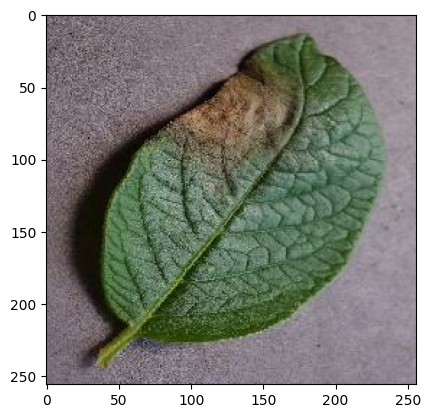

In [4]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    

In [5]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [6]:
train_ds=dataset.take(54)
len(train_ds)

54

In [7]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [8]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [9]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [10]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [11]:
def get_dataset(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size= int(train_split * ds_size)
    val_size= int(test_split * ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds,test_ds
    

In [12]:
train_ds, val_ds,test_ds=get_dataset(dataset)

In [13]:
len(train_ds)

54

In [14]:
len(val_ds)

6

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 128  # or whatever size you need

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [ ]:
data_agumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
    

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# Define necessary variables
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS = 3
n_classes = 10
EPOCHS = 50  # Define the number of epochs

# Dummy data augmentation layer, replace with actual augmentation if available
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Create the resize and rescale layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# Define the input shape
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Create the model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),  # Remove additional pooling layers
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model
model.build(input_shape=input_shape)

# Compile the model with an optimizer, loss function, and metrics
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),  # or losses.CategoricalCrossentropy() if your labels are one-hot encoded
    metrics=[metrics.SparseCategoricalAccuracy()]  # or metrics.CategoricalAccuracy() if your labels are one-hot encoded
)

# Assuming train_ds and val_ds are defined
# train_ds and val_ds should be tf.data.Dataset objects or similar
# Here's a dummy definition for example purposes
train_ds = tf.data.Dataset.from_tensor_slices((tf.random.normal([100, IMAGE_SIZE, IMAGE_SIZE, CHANNELS]), tf.random.uniform([100], maxval=n_classes, dtype=tf.int32))).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((tf.random.normal([20, IMAGE_SIZE, IMAGE_SIZE, CHANNELS]), tf.random.uniform([20], maxval=n_classes, dtype=tf.int32))).batch(BATCH_SIZE)

# Train the model


In [25]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 7.0410 - sparse_categorical_accuracy: 0.0943


In [31]:
# Access the history object returned by model.fit()
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

# Access the history dictionary
history_dict = history.history

# Print the keys in the history dictionary
print(history_dict.keys())

# Access the values for each key
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['sparse_categorical_accuracy']
val_accuracy = history_dict['val_sparse_categorical_accuracy']

# Print the values
print(f"Loss: {loss}")
print(f"Validation Loss: {val_loss}")
print(f"Accuracy: {accuracy}")
print(f"Validation Accuracy: {val_accuracy}")


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0584 - val_loss: 2.3042 - val_sparse_categorical_accuracy: 0.0500
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 2.2964 - sparse_categorical_accuracy: 0.1397 - val_loss: 2.3184 - val_sparse_categorical_accuracy: 0.0500
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 2.2751 - sparse_categorical_accuracy: 0.1397 - val_loss: 2.4239 - val_sparse_categorical_accuracy: 0.0500
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 2.2733 - sparse_categorical_accuracy: 0.1357 - val_loss: 2.3822 - val_sparse_categorical_accuracy: 0.0500
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 2.2539 - sparse_categorical_accuracy: 0.2029 - val_loss: 2.3405 - val_sparse_categorical_accuracy: 0.0500
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 2.2613 - sparse_categorical_accuracy: 0.2029 - val_loss: 2.3500 - val_sparse_categorical_accuracy: 0.0500
Epoch 7/50
4/4 ━

In [47]:
import numpy as np

# First array
arr1 = [0.1003985, 0.30799472, 0.0035606, 0.1922978, 0.09521641, 0.02505156, 0.01588968, 0.01080029, 0.23801574, 0.01077462]
index1 = np.argmax(arr1)
print("Index of the maximum value in arr1:", index1)

# Second array
arr2 = [0.1003985, 0.30799472, 0.0035606, 0.1922978, 0.09521641, 0.02505156, 0.01588968, 0.01080029, 0.23801574, 0.01077462]
index2 = np.argmax(arr2)
print("Index of the maximum value in arr2:", index2)


Index of the maximum value in arr1: 1
Index of the maximum value in arr2: 1


firstimage to prdict
firstimage actual label : Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
predicted label : Potato___Late_blight


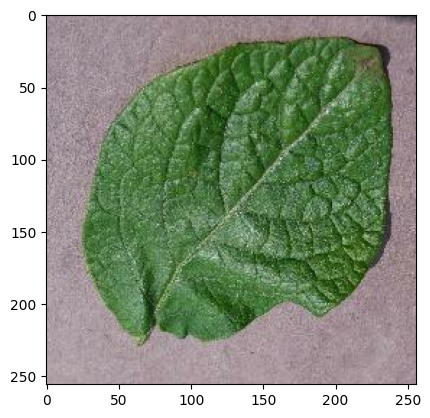

In [54]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print("firstimage to prdict")
    plt.imshow(first_image)
    print("firstimage actual label :",class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])
